# DAV 6400 Final Project - Fish Size

## Randy(Qinghao) Xia, Qihua Zhu

The dataset we picked is from the *REGRESSION: Liner Regression Datasets*. The dataset cotains two independent variables and they are **the age of the fish** and **the temperature of the water** that the fish live in. One dependent variable that is the **length of a species of fish**.

>"The purpose of this project is to see if there is any relationship between two independent variables and the dependent variable." 


First of all, we decide to analyze the relationship between the **the age of the fish** and the **length of fish**. Therefore,

Our null hypothesis is:
The age of fish has no significant relationship with the length of fish.


Our alternative hypothesis is:
The age of fish has significant relationship with the length of fish.


Then, we will analyze the relationship between the **the temperature of the water** and the **length of fish**.
For this part,

Our null hypothesis is:
The temperature of fish has no significant relationship with the length of fish.


Our alternative hypothesis is:
The temperature of the water has significant relationship with the length of fish.

# Inspection of the data

Here we inspect and describe each variable of the data.

The dataset is from the website called *REGRESSION: Liner Regression Datasets*. This dataset cotains three columns and 44 rows that collect the infomation of the age of fish, water temperature, and the length of fish. The original data is from *Mathematical Agorithmes ofr Linear Regression* written by Helmut Spaeth, and *Regression Methods* written by R J Freund and P D Minton. We will include the external citation under Reference page.

The age of the fish shows how long the fish has been born, it is counted in the days. For example, the first row in the Age of fish column is 14 which means the is 14 days old.

The temperature of wate column cotains the data of how warm the water is in term of degrees Celsius. For instant, the first 10 rows are all 25, and this means that the water temperature for the first 10 rows are all 25 Celsius degrees.

The length of fish column cotains the data that shows how long a species of fish are in term of millimeter.

The form of the model we think for thi dataset is:
B = A1 * X1 + A2 *X2

## Step 1: Import modules

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [15]:
# load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/qxia2/DAV.5400/master/Fish.csv")

## Line by Line




In [16]:
df

,Age_of_fish,Temperature_of_water,Length_of_fish
0,14,25,620
1,28,25,1315
2,41,25,2120
3,55,25,2600
4,69,25,3110
5,83,25,3535
6,97,25,3935
7,111,25,4465
8,125,25,4530
9,139,25,4570


## Summary Statistics

According to the summary, we can tell that our data contains 44 rows of three variables. Based on the data dictionary, we understand that there are 44 species of fish cotained in this dataset. Now let us take a look into each variables.

First of all, the statistics results of the age of fish column show that the youngest fish species in this dataset is only 14 days old while the oldest fish species is 153 days old. The average age of fish is around 83 days. The standard devation of the age of fish is around 45 days. The middle value of lower half(25 percent quantiles) is 41 days, and the middle value of the upper half or lowest 75 percent of data is 125 days.

Also, the results of water temperature show that the lowest temperature is 25 celsius degrees, the highest temperature is 31 celsius degrees. The average temperature is 28 celsius degrees. The standard devation of the water temperature is 2.26 celsius degrees. The mean the water temperature is either positive 2.26 celsius degrees or negative 2.26 celsius degrees depart from the average water temperature. The 25 percent quantile for water temperature data is 26.5 celsius degrees, and the middle value of lowest 75 percent of water temperature data is 29.5 celsius degrees.

Lastly, the results of length of fish show that the shortest fish species is about 590 millimeters while the longest fish species is 4,600 milimeters. The average length is abount 3,107 millimeters. The standard devation is around 1,328 millimeters. The 25 percent quantile for length of fish is 2,135 millimeters, and the 75 percent quantile for length of fish is 4,500 millimeters.  

In [17]:
df.describe()

,Age_of_fish,Temperature_of_water,Length_of_fish
count,44.000000,44.000000,44.000000
mean,83.181818,28.000000,3107.431818
std,44.522935,2.261919,1328.962883
min,14.000000,25.000000,590.000000
25%,41.000000,26.500000,2135.000000
50%,83.000000,28.000000,3197.000000
75%,125.000000,29.500000,4500.000000
max,153.000000,31.000000,4600.000000


# Visual Inspection of the data

From the first boxplot of the data we could hardly see the chart of age of the fish and water teamperature due to the large difference in the numbers in each column. Therefore, we decide that we should drow the chart individually.

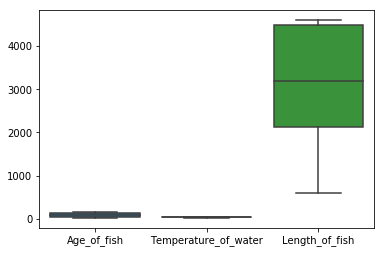

In [18]:
import seaborn as sns

sns.boxplot(data=df)

According to the boxplot below, the data in the age of fish column is normally distributed since 25 percent quantile line and 75 percent quantile line are both around 40 days apart from the 50 percent quantile line.

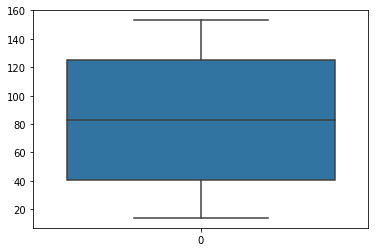

In [19]:
sns.boxplot(data=df['Age_of_fish'])

According to the boxplot below, the data in the water temperature column is normally distributed since 25 percent quantile line and 75 percent quantile line are both around 1.5 celsius degrees apart from the 28 celsius degrees which is 50 percent quantile line.

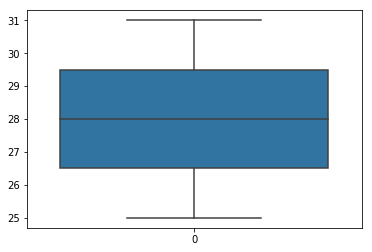

In [20]:
sns.boxplot(data=df['Temperature_of_water'])

The boxplot of the length of fish shows that there is a left skewed distribution exist since most data are fall between the 50 percent quantile and 75 percent quantile. One of other way to tell this is a left skewed distribution is that the average length is 3,107 millimeters and this is 90 millimeters less than the 3,197 median. Therefore, the distrbution chart would be left skewed but very close to the normanl distribution.

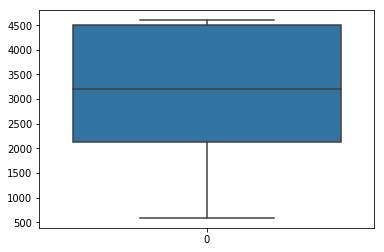

In [21]:
sns.boxplot(data=df['Length_of_fish'])

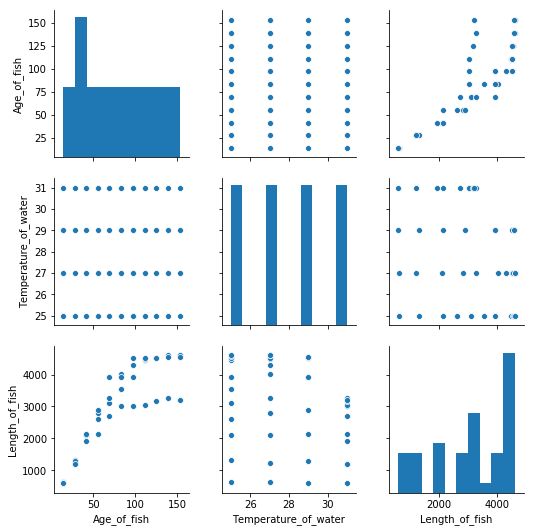

In [22]:
import seaborn as sns
sns.pairplot(df)

The above plots show us histograms of each dataset, and scatterplots of their relationships between each other.

Does the variable we want to predict (y) have a relationship with the first X variable? What about the other two pairs?
Base on the observation of the plots, we predict that there is a strong positive relationship between the age of fish and the length of a species of fish. Also, we predict that there is no relationship between the water temperature a species of fish live in and the length of fish. Although there are some outliners shown in the scatterplot of length of fish and age of fish. It is still clear that there is a strong relationship between the age and the length of the fish. The scattorplots of other two variables don't show any relationship between each other.  

Also according to the histogram, we find that the data of age of fish is right-skewed distributed, the data of  length of fish is left-skewed distrubuted, and the water temperature data is uniformly distribution. The results of distribution based on observation of the histograms of age of fish and water temperature don't agree with the results based on boxplot observation. Therefore we decide follow the result of histograms since they are more intuitive.  

# Tables of Regression Results

In [23]:
model = sm.OLS(df['Length_of_fish'], sm.add_constant(df['Age_of_fish']))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Length_of_fish   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     142.9
Date:                Thu, 02 May 2019   Prob (F-statistic):           4.20e-15
Time:                        14:25:41   Log-Likelihood:                -345.78
No. Observations:                  44   AIC:                             695.6
Df Residuals:                      42   BIC:                             699.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         924.6842    206.584      4.476      

The R-squared number in OLS regression results based on the relationship between the length and age of fish is about 77.3 percent. This means that we are about 77.3 percent correct if we predict that the age of fish can affect the length of fish. Since the P-vaule is less than 0.05, we think that the length of fish is affected by the age of fish.

In [24]:
model = sm.OLS(df['Length_of_fish'], sm.add_constant(df['Temperature_of_water']))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Length_of_fish   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.424
Date:                Thu, 02 May 2019   Prob (F-statistic):              0.239
Time:                        14:25:41   Log-Likelihood:                -377.65
No. Observations:                  44   AIC:                             759.3
Df Residuals:                      42   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6087.0136 

The R-squared score is only about 3.3 percent. This means we only have 3.3 percent change correct if we predict that the length of fish affected by the water temperature. Also, the P-value is more than 0.05, thus we reject the hypothesis that there is a relationship bwtween the water temperature and length of fish.

# Analysis, Qualitative and Quantitative
According to the result that p-value is less than 0.05 for the relationship betweenn Length_of_fish and Age_of_fish,  there is a strong positive relationship between the data we have examined.

In [36]:
from sympy import init_printing, Matrix, Symbol, Function

x = Symbol('x')
f = Function('f')

def f(x):
    return x*26.2407 + 924.6842

In [37]:
f(10),f(20),f(50),f(100)

We also examined the model by feeding back some sample numbers of age of fish from 10 to 100 and the result are close to the acutal data.

## A New Framework of Analysis

# Final Conclusions

So we rejected the null hypothesis that the age of fish has no significant relationship with the length of fish annd failed to reject the null hypothesis that The temperature of the water has significant relationship with the length of fish.

The reason is the first one has the P-value is 0.000 which is less than 0.05 and the second P-value is 0.239 which is more than 0.05

Since the R-squared of first model is 0.773 so the result is pretty convincing.

Also, according to another research that about the relationship between age of fish and their length from Manual of fisheries survey methods II, our result is quite reasonable.

# Reference

Schneider, James C., P. W. Laarman, and H. Gowing. 2000. Age and growth methods and
state averages. Chapter 9 in Schneider, James C. (ed.) 2000. Manual of fisheries survey
methods II: with periodic updates. Michigan Department of Natural Resources, Fisheries
Special Report 25, Ann Arbor.

Amrhein, V., Greenland, S., & McShane, B. (2019, March 20). Scientists rise up against statistical significance. Retrieved May 2, 2019, from https://www.nature.com/articles/d41586-019-00857-9